<a href="https://colab.research.google.com/github/Makori81/Data-Science-/blob/main/Traffic_accidents_severity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
makori = pd.read_csv('/content/drive/MyDrive/road_accidents.csv')
print("Shape of the dataset:", makori.shape)
makori.head()

In [ ]:
import pandas as pd
makori = pd.read_csv('/content/drive/MyDrive/road_accidents.csv')
data = makori.loc[:,['curvature', 'accident_risk']]
data.head(5)

<Figure size 1200x800 with 0 Axes>

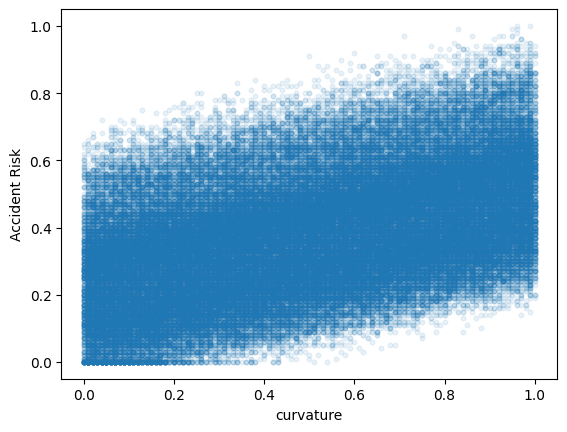

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
makori = pd.read_csv('/content/drive/MyDrive/road_accidents.csv')

plt.figure(figsize=(12,8))
makori.plot(kind='scatter', x='curvature', y='accident_risk', style='o', alpha=0.09, s=11)
plt.xlabel('curvature')
plt.ylabel('Accident Risk')
plt.show()



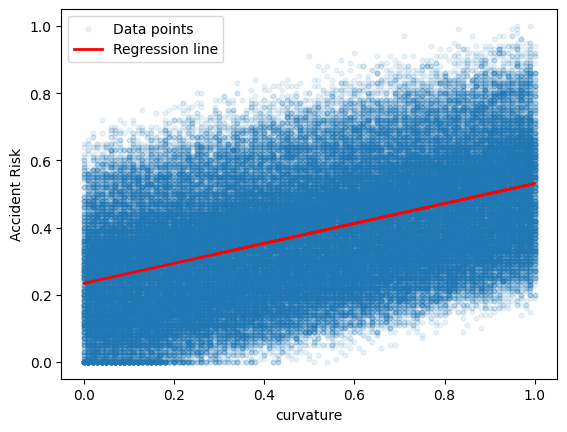

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

makori = pd.read_csv('/content/drive/MyDrive/road_accidents.csv')
X = makori[['curvature']]
y = makori['accident_risk']

regressor = LinearRegression()
regressor.fit(X, y)

makori.plot(kind='scatter', x='curvature', y='accident_risk', style='o', alpha=0.09, s=11, label='Data points')

plt.plot(X, regressor.predict(X), color='red', linewidth=2, label='Regression line')
plt.xlabel('curvature')
plt.ylabel('Accident Risk')
plt.legend()
plt.show()



In [45]:
import pandas as pd
makori = pd.read_csv('/content/drive/MyDrive/road_accidents.csv')
x = pd.DataFrame(makori['curvature'])
y = pd.DataFrame(makori['accident_risk'])


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split

makori = pd.read_csv('/content/drive/MyDrive/road_accidents.csv')
X = pd.DataFrame(makori['curvature'])
y = pd.DataFrame(makori['accident_risk'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 1)
(20000, 1)
(80000, 1)
(20000, 1)


In [50]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:
print(regressor.intercept_)

[0.23409518]


In [52]:
print(regressor.coef_)

[[0.29701417]]


In [84]:
intercept = 0.23489518
coefficient = 0.29781417

high_curvature = 0.9
low_curvature = 0.4

high_risk = intercept + coefficient * high_curvature
low_risk = intercept + coefficient * low_curvature
percentage_diff = ((high_risk - low_risk) / high_risk) * 100

print(f"\nReducing curvature from {high_curvature} to {low_curvature} reduces accident risk by {percentage_diff:.1f}%")


Reducing curvature from 0.9 to 0.4 reduces accident risk by 29.6%


In [54]:
y_pred = regressor.predict(X_test)
y_pred

array([[0.30240844],
       [0.41824396],
       [0.27567716],
       ...,
       [0.37963212],
       [0.50437807],
       [0.42715439]])

In [55]:
y_test.head(10)

,accident_risk
43660,0.29
87278,0.60
14317,0.25
81932,0.36
95321,0.53
5405,0.48
33188,0.40
63421,0.06
72897,0.00
9507,0.42


In [56]:
from sklearn import metrics
import numpy as np

mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.1296439664269597
Mean Squared Error: 0.02480203484176151
Root Mean Squared Error: 0.1574866179767713


In [57]:
import joblib
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x, y)

joblib.dump(model, 'Linear_Regression_model.pk1')

['Linear_Regression_model.pk1']

In [81]:
import joblib
import numpy as np
import pandas as pd

new_X = np.array([1,1.3,1.5,1.7,2]).reshape(-1, 1)

model = joblib.load('Linear_Regression_model.pk1')

predictions = model.predict(new_X)
new_data = pd.DataFrame({'X': new_X.flatten(), 'Predicted_y': predictions.flatten()})
print(new_data)

     X  Predicted_y
0  1.0     0.530863
1  1.3     0.619923
2  1.5     0.679297
3  1.7     0.738670
4  2.0     0.827731


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
